<a href="https://colab.research.google.com/github/vipul43/image_description/blob/main/MutliModalClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installs

In [2]:
# imports
import scipy.io
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import pandas as pd
from PIL import Image 
import matplotlib.pylab as plt
import pickle
from skimage import transform
from sklearn.model_selection import train_test_split
import tensorflow as tf
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
import spacy
import nltk
import keras.backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [3]:
nltk.download('punkt') #tokenizer
nltk.download('wordnet') #lemmatization

lemmatizer = WordNetLemmatizer() #lemmatizer

sp = spacy.load('en_core_web_sm') #lexical importance find

ls = LancasterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
# data loading

!gdown --id 1mrjvJq6XNM8QAgajSgrVGpsj8Vrm3BEm #PASCAL50S

mat = scipy.io.loadmat('/content/pascal50S.mat')
print(type(mat))

Downloading...
From: https://drive.google.com/uc?id=1mrjvJq6XNM8QAgajSgrVGpsj8Vrm3BEm
To: /content/pascal50S.mat
100% 1.12M/1.12M [00:00<00:00, 74.8MB/s]
<class 'dict'>


In [5]:
classes = ['person',
           'bird', 
           'cat', 
           'cow', 
           'dog',
           'horse',
           'sheep', 
           'aeroplane', 
           'bicycle', 
           'boat', 
           'bus', 
           'car', 
           'motorbike', 
           'train', 
           'bottle', 
           'chair', 
           'dining table',
           'potted plant',
           'sofa', 
           'tv/monitor']

dict_classes = {'person':0, 'man':0, 'human':0, 'people':0, 'men': 0, 'girl':0, 'boy':0, 
                    'serviceman':0, 'homo':0, 'valet':0, 'child':0, 'family':0, 'group':0, 
                    'woman':0, 'women':0, 'couple':0, 'her':0, 'his':0, 'rider':0, 'him':0, 
                    'he':0, 'she':0, 'child':0, 'children':0, 'baby':0, 'guy':0, 'gentleman':0,
                    'lady':0, 'grandma':0, 'friend':0, 'mother':0, 'father':0, 'teen':0, 'kid':0,
                    'teenager':0, 'cowboy':0, 'daughter':0, 'dad':0, 'son':0,
                'bird':1, 'penguin':1, 'parrot':1, 'sparrow':1, 'dame':1, 'boo':1, 'eagle':1, 
                    'cockatoo':1, 'hummingbird':1, 'duck':1, 'goose':1, 'songbird':1, 'dove':1,
                    'chicken':1, 'rooster':1, 'chick':1, 'crow':1, 'hawk':1, 'canary':1, 'peacock':1,
                    'magpie':1, 'swan':1, 'kingfisher':1, 'kookaburra':1, 'owl':1, 'woodpecker':1,
                    'crane':1,
                'cat':2, 'pussy':2, 'kitty':2, 'wildcat':2, 'kitten':2,
                'cow':3, 'calf':3, 'bullock':3, 'bull':3, 'ox':3,
                'dog':4, 'greyhound':4, 'pug':4, 'puppy':4, 'schnauzer':4, 'pooch':4, 'tyke':4,
                    'labrador':4, 'bulldog':4, 'chihuahua':4, 'pomeranian':4, 'bernard':4, 'bitch':4,
                'horse':5, 'stallion':5, 'pony':5, 'mare':5,
                'sheep':6, 'goat':6, 'ram':6, 'ewe':6, 'lamb':6,
                'aeroplane':7, 'airplane':7, 'flight':7, 'plane':7, 'jet':7, 'aircraft':7, 'biplane':7,
                'bicycle':8, 'cycle':8, 'bike':8, 
                'boat':9, 'ship':9, 'cruise':9, 'canoe':9, 'kayak':9, 'barge':9,
                'bus':10, 'van': 10,
                'car':11, 'corvette':11, 'truck':11, 'supercar':11, 'coupe':11, 'sedan':11, 'roadster':11,
                    'hatchback':11, 'minivan':11,
                'motorbike':12, 'motorcycle':12,
                'train':13, 'locomotive':13, 'freight':13,
                'bottle':14, 'flask':14,
                'chair':15, 'armchair':15, 'rocker':15, 'recliner':15,
                'dining':16, 'table':16,
                'plant':17, 'sapling':17, 'flowerpot':17, 'potted':17,
                'sofa':18, 'couch':18, 'lounge':18,
                'tv':19, 'monitor':19, 'television':19, 'desktop':19, 'computer':19}

rever_dict_classes = {
            0: 'person',
            1: 'bird',
            2: 'cat',
            3: 'cow',
            4: 'dog',
            5: 'horse',
            6: 'sheep',
            7: 'aeroplane',
            8: 'bicycle',
            9: 'boat',
            10: 'bus',
            11: 'car',
            12: 'motorbike',
            13: 'train',
            14: 'bottle',
            15: 'chair',
            16: 'dining table',
            17: 'potted plant',
            18: 'sofa',
            19: 'tv/monitor'}

In [6]:
count = {'0':0,   #person
           '1':0, #bird
           '2':0, #cat
           '3':0, #cow
           '4':0, #dog
           '5':0, #horse
           '6':0, #sheep
           '7':0, #aeroplane
           '8':0, #bicycle
           '9':0, #boat
           '10':0, #bus
           '11':0, #car
           '12':0, #motorbike
           '13':0, #train
           '14':0, #bottle
           '15':0, #chair
           '16':0, #dining
           '17':0, #potted plant
           '18':0, #sofa
           '19':0} #tv/monitor

In [7]:
# observing data
data = []
idx=0
for sample in mat["train_sent_final"][0]:
  # image = io.imread(i[0][0])
  # cv2_imshow(image)
  link = [sample[0][0]] #image link
  cls = set()
  for k in sample[1]:
    for sent in k:
      # if idx==10:
      #   break
      # idx+=1

      for word in sent[0].split():
        pre_word = lemmatizer.lemmatize(ls.stem(word.lower()))
        if(pre_word in dict_classes.keys()):
          cls.add(dict_classes[pre_word])
  for cl in cls:
    count[str(cl)]+=1
  data.append([link, list(cls)])

In [8]:
file = open("data.pkl", "wb")
pickle.dump(data, file)
file.close()

In [9]:
# preprocessing the dataset
'''
data -> url -> image -> array -> resized array
TrainX = array of images resized to (224x224x3)
TrainY = array of labels with size (20x1) in ones-zeros vector like [1, 1, 0, ....]
'''
# TrainX
new_shape = (224, 224, 3)
TrainX1 = []

for point in data:
  photo = io.imread(point[0][0])
  photo = transform.resize(image=photo, output_shape=new_shape)
  TrainX1.append(photo)

TrainX1 = np.array(TrainX1)

In [10]:
file = open("TrainX1.pkl", "wb")
pickle.dump(TrainX1, file)
file.close()

**Loading the TrainX1 Pickle file**

In [11]:
pickle_in = open("TrainX1.pkl","rb")
TrainX1 = pickle.load(pickle_in)

In [12]:
# TrainY
TrainY = []
for points in data:
  full_label = np.zeros(shape=(20, ))
  for label in points[1]:
    full_label[label] = 1
  TrainY.append(full_label)
TrainY = np.array(TrainY)

**Models**

In [13]:
# model making(Image to Vector)
# input layer
input1 = tf.keras.Input(shape=(224, 224, 3), name='input1')

# Transfer Learning with VGG16 model with weights as imagenet
vgg16 = tf.keras.applications.VGG16(include_top=False, weights="imagenet", classes=20)
vgg16.trainable = False
x = vgg16(input1)

# Dense Layers
x = tf.keras.layers.Flatten(name='flatten')(x)
x = tf.keras.layers.BatchNormalization(name='norm1')(x)
x = tf.keras.layers.Dense(192, activation='relu', name='dense1')(x)
x = tf.keras.layers.BatchNormalization(name='norm2')(x)
x = tf.keras.layers.Dense(84, activation='relu', name='dense2')(x)
x = tf.keras.layers.BatchNormalization(name='norm3')(x)
x = tf.keras.layers.Dense(64, activation='relu', name='dense3')(x)
x = tf.keras.layers.BatchNormalization(name='norm4')(x)

#Output layer
output = tf.keras.layers.Dense(500, activation="linear", name='output')(x)

model1 = tf.keras.models.Model(inputs=input1, outputs=output, name='model1')

model1.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input1 (InputLayer)          [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
norm1 (BatchNormalization)   (None, 25088)             100352    
_________________________________________________________________
dense1 (Dense)               (None, 192)               4817088   
_________________________________________________________________
norm2 (BatchNormalization)   (None, 192)               768       
_____________________________________________________________

**Text Model(Model2)**

#**Data Preprocessing**

In [14]:
# observing data for text Model
data2 = []
stringX2 = []
idx=0
for sample in mat["train_sent_final"][0]:
  # image = io.imread(i[0][0])
  # cv2_imshow(image)
  link = [sample[0][0]] #image link
  cls = set()
  for k in sample[1]:
    for sent in k:
      # if idx==10:
      #   break
      # idx+=1

      for word in sent[0].split():
        pre_word = lemmatizer.lemmatize(ls.stem(word.lower()))
        if(pre_word in dict_classes.keys()):
          cls.add(dict_classes[pre_word])
  for cl in cls:
    count[str(cl)]+=1

  for k in sample[1]:
    for sent in k:
      stringX2.append(sent[0])
      temp = np.zeros(shape=20)
      for ele in list(cls):
        temp[ele] = 1
      data2.append([sent, temp])

In [15]:
#Preparation of TrainX2 and Trainy2 for Text Model(Model2)
tk = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~\t\n')
tk.fit_on_texts(stringX2)
X_seq = tk.texts_to_sequences(stringX2)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post')
X_pad.shape
TrainX2 = X_pad
Trainy2 = np.zeros(shape=(len(data2), 20))
i = 0
for d in data2:
  Trainy2[i] = np.array(d[1])
  i = i + 1

In [16]:
INP_LEN1 = 100 #(Text to Vector)
input2 = tf.keras.Input(shape=(INP_LEN1,), name='input')
embed = tf.keras.layers.Embedding((len(tk.word_counts)+1),INP_LEN1)(input2)
rnn1 = tf.keras.layers.GRU(192, return_sequences=True, dropout=0.3)(embed)
pool = tf.keras.layers.MaxPool1D()(rnn1)
rnn2 = tf.keras.layers.GRU(128, dropout=0.2)(pool)
dense1 = tf.keras.layers.Dense(84, activation='relu')(rnn2)
drop1 = tf.keras.layers.Dropout(0.2)(dense1)
norm1 = tf.keras.layers.BatchNormalization()(drop1)
output = tf.keras.layers.Dense(500, activation='linear')(norm1)

model2 = tf.keras.models.Model(inputs=input2, outputs=output, name='model2')
model2.summary()


Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 100)          758600    
_________________________________________________________________
gru (GRU)                    (None, 100, 192)          169344    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 192)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               123648    
_________________________________________________________________
dense (Dense)                (None, 84)                10836     
_________________________________________________________________
dropout (Dropout)            (None, 84)                0    

**Concatenating the Image Model(Model1) and Text Model(Model2)**

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input1 (InputLayer)             [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
vgg16 (Functional)              (None, None, None, 5 14714688    input1[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 25088)        0           vgg16[0][0]                      
__________________________________________________________________________________________________
input (InputLayer)              [(None, 100)]        0                                            
______________________________________________________________________________________________

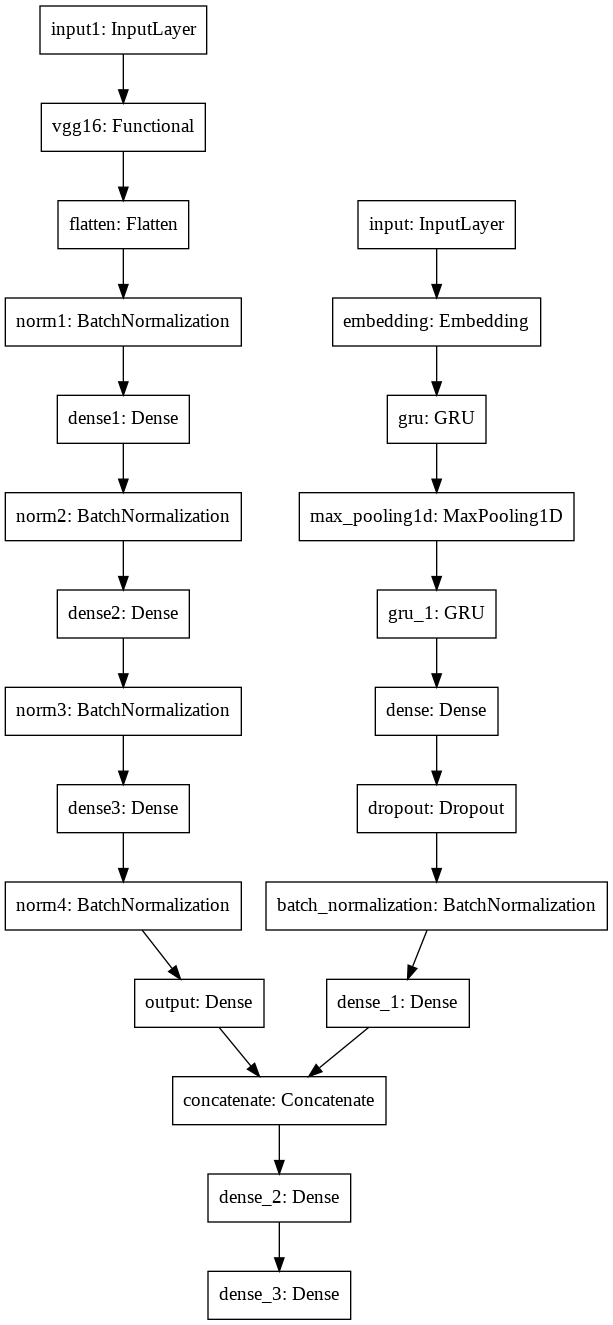

In [17]:
concate = tf.keras.layers.Concatenate(axis=-1)([model1.output, model2.output])
final_dense = tf.keras.layers.Dense(256, activation='relu')(concate)
Output = tf.keras.layers.Dense(20, activation='sigmoid')(final_dense)
finalModel  = tf.keras.models.Model(inputs=[input1,input2],outputs=Output)

finalModel.summary()
tf.keras.utils.plot_model(finalModel,to_file="finalModel.png")

**Train the MultiModal**

In [18]:
finalModel.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001), loss='binary_crossentropy',metrics=[tf.keras.metrics.BinaryAccuracy()])

In [19]:
finalModel.fit([TrainX1, TrainX2], TrainY, validation_split=0.2, epochs=100)

Epoch 1/100
25/25 [==============================] - 48s 279ms/step - loss: 0.6829 - binary_accuracy: 0.5630 - val_loss: 0.6503 - val_binary_accuracy: 0.7042
Epoch 2/100
25/25 [==============================] - 4s 169ms/step - loss: 0.5469 - binary_accuracy: 0.8200 - val_loss: 0.5941 - val_binary_accuracy: 0.8825
Epoch 3/100
25/25 [==============================] - 4s 170ms/step - loss: 0.4160 - binary_accuracy: 0.9188 - val_loss: 0.4966 - val_binary_accuracy: 0.9190
Epoch 4/100
25/25 [==============================] - 4s 169ms/step - loss: 0.2982 - binary_accuracy: 0.9355 - val_loss: 0.3852 - val_binary_accuracy: 0.9285
Epoch 5/100
25/25 [==============================] - 4s 171ms/step - loss: 0.2202 - binary_accuracy: 0.9382 - val_loss: 0.3177 - val_binary_accuracy: 0.9287
Epoch 6/100
25/25 [==============================] - 4s 171ms/step - loss: 0.1771 - binary_accuracy: 0.9427 - val_loss: 0.2791 - val_binary_accuracy: 0.9268
Epoch 7/100
25/25 [==============================] - 4s 1

**Predictions**

True Classes in the image:  ['chair', 'sofa']
Predicted Classes in the image:  ['chair', 'sofa']


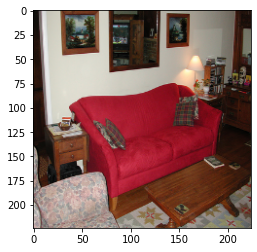

In [41]:
rnd = np.random.randint(0, len(TrainX1))
sampleX1 = np.expand_dims(TrainX1[rnd], axis=0)
sampleX2 = np.expand_dims(TrainX2[rnd], axis=0)
label = TrainY[rnd]
pred = finalModel.predict([sampleX1, sampleX2])[0]
pred = (pred > 0.5)
pred = pred.astype(int)
plt.imshow(TrainX1[rnd])
true = []
approx = []
for i in range(20):
  if label[i] == 1:
    true.append(rever_dict_classes[i])
  if pred[i] == 1:
    approx.append(rever_dict_classes[i])
print("True Classes in the image: ", true)
print("Predicted Classes in the image: ", approx)

**Save the Model**

In [ ]:
tf.keras.utils.plot_model(finalModel, to_file="finalModel.png")